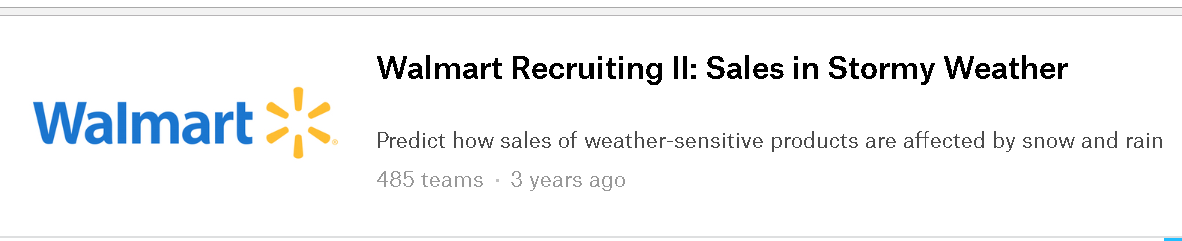

## **Title: 기후 조건에 따른 월마트 판매량 분석**

## **Team : NaN4** 
## **Date : 2018. 07. 07**

## **Agenda**

### 1. 분석 목적 
### 2. 분석 결과 
### 3. 데이터 개괄 
### 4. 변수 탐색 및 전처리 (EDA)
### 5. 모델 회귀 및 검정 
### 6. 모델 성능 분석 
### 7. 분석의 제한점 및 후속 분석 

## **1. 분석 목적**

### A. Kaggle competition 목표 

- 월마트는 45개의 소매점에서 주요한 기후 측정의 일별 기록과,   
기후 변화에 민감하게 반응하는 111개의 제품 판매량 자료를 제공하며,  
기후 조건에 따라 최적의 판매량 예측 모델을 수립하도록 한다.   

- 최적의 판매량 예측 모델은 stormy weather 시 재고 관리를 주요 목적으로 한다  
  (기후 조건에 따라 판매되는 물품의 재고 부족과 공급 과잉 방지).

### B. 제시된 모델 성능 평가 방법 

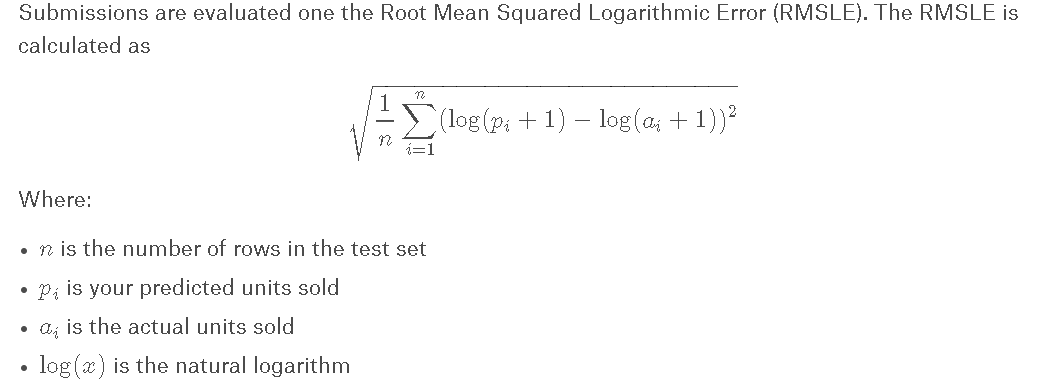


## **2. 분석 결과** 

### 0. 모델 목표


- 기후 조건에 따른 월마트의 재고 관리 애로 사항을 해결하는 예측 모델 만들기.  
- 단 과거 데이터가 단순히 수요와 공급의 일치에서 나온 데이터가 아니라, 재고 관리라는 또 다른 변수가 

### A. 모델 회귀 및 검정 

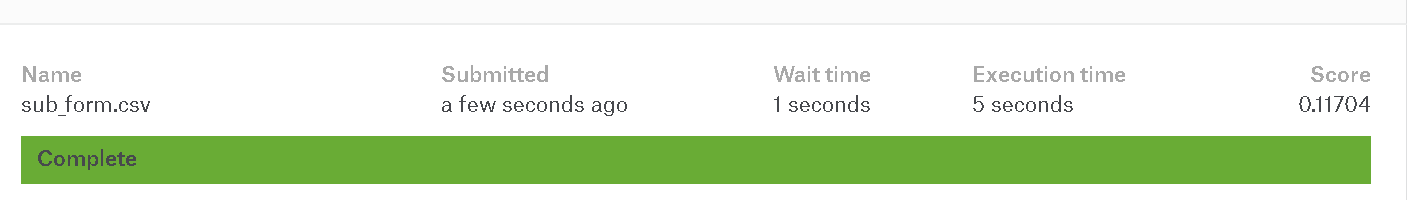

0.11704 스코어, 약 150 / 450(상위 30%)의 성적


### B. 모델 성능 평가 


##### 회귀 모델 검정 통계량


| 모델 평가 지표 | 값 |
| ---- | ---- |
|Adj. R-squared:                |  0.899|
|   F-statistic:                |     7621 |
|Prob (F-statistic):             |  0.00|
| Durbin-Watson:                |   1.847 |
|  Jarque-Bera (JB):          |  27823.912|
|Prob(JB):                     |    0.00|
|Skew:                         | 0.053  |
|Kurtosis:                    |   5.221   |
|Cond. No.                    |     134.|




### C. 모델 해석 

$Y_t$ = $C(t) + S(t) + E(t) + \epsilon$  
$C(t)$ : 외부 특성과 상관 없이 아이템, 스토어 특성에 따라 판매되는 양  
$S(t)$ : 계절적인 요인으로 변동되는 양  
$E(t)$ : 휴일, 블랙프라이데이 등 날짜에 따라 판매되는 양        
$E(t)_1$ : 날씨 상황에 따라 판매되는 양  
  
결론적으로   $C(t)$, $E(t)_1$ 만이 중요한 영향을 끼친다.    
$S(t)$의 경우 수요 감소 이전에 재고 관리를 통해 계절적인 특성이 제거되며,  
$E(t)_1$의 경우 매우 많은 양의 강수량, 혹은 눈은 수요에 부정적인 영향을 끼치지만,  
일정량 이하의 강수량은 소비에 영향을 크게 끼치지 않는다.  
  
##### **회귀 모델 변수**

최종 선택 변수
- store_nbr
- item_nbr
- FZ
- is_blackfriday
- hardsnow
- preciptotal



|variable |coef|std err|t|P>abs(t)|
|--------|--------|-----|---|---|---|
|FZ)[T.1]                |  0.0517    |   0.012      | 4.243  |     0.000      | 
|(is_blackfriday)[T.1]  |   -0.2019  |     0.017    | -11.979|       0.000    | 
|C(hardsnow)[T.1]        |    0.0452  |     0.013    |   3.538|       0.000    | 
|C(hardsnow)[T.2]        |    0.0154  |     0.032    |   0.474|       0.635    | 
|C(hardsnow)[T.3]        |   -0.2116  |     0.044    |  -4.821|       0.000    | 
|scale(preciptotal)      |   -0.0293  |     0.002    | -18.452|       0.000    | 

## **3. 데이터 개괄** 

### A. 데이터 설명 

- **key.csv** - 소매점과 기후관측소와의 mapping 자료 

- **sampleSubmission.csv** - prediction 제출용 포맷 파일 

- **train.csv** - 모든 소매점에서의 일별 판매량 자료 (training set) 
    
- **test.csv** - 판매량 예측용 소매점 일별 자료 (test set) 

- **weather.csv** - 일별 기후관측소에서의 날씨 자료 (NOAA weather info) 


### B. 주요 변수 설명 

- units : 아이템 별 판매 개수 

- date : 판매량과 기후 측정 날짜

- store_nbr : 소매점 아이디 

- station_nbr : 기후관측소 아이디 

- item_nbr : 제품 아이디 

- weather features : tmax, tmin, tavg, dewpoint, wetbulb, depart, heat, cool, snowfall, precipitation, stnpressure, sealevel, resultspeed, resultdir, avgspeed, .....


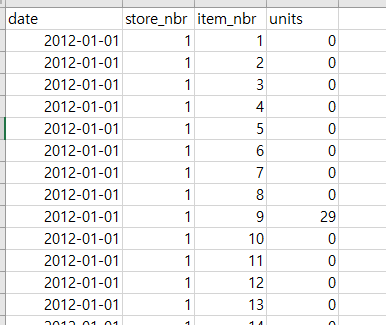
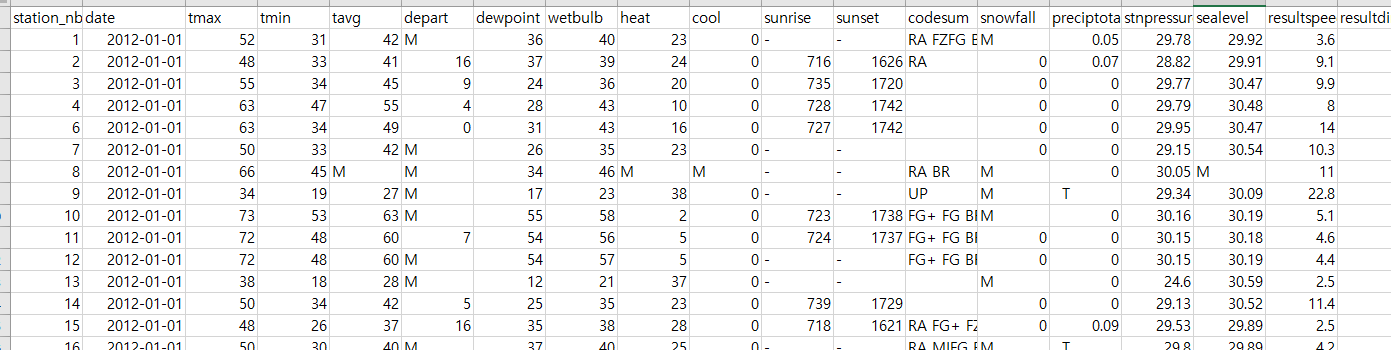

## **4. 변수 탐색 및 전처리 (EDA)**

### A. 전반적인 분석 순서 
- Data merge 
- Data cleaning
- Data exploration 
- Model fitting 
- OLS Assumption / residual / multicolinearity check 
- Performance test with validation set 


### B. 변수 전처리 및 생성  
- 3년 동안 한번도 팔리지 않은 제품군 삭제 (0으로 가정) 
- 날짜 변수 추가 및 정제 : 연, 월, 일, 분기, 요일, 주말, 계절, 공휴일, BlackFriday  
- M값 NaN으로 변환 (missingness) 
- T값은 해당 열 $최소값 \over 2$로 처리
- 이벤트(codesum) 개별 더미 변수화 


### C. 변수 탐색 (key result only) 
- 아이템 재고 관리 특성 별 분류 

    - 계절적 판매 아이템   
    
        - 1월부터 9월까지만 판매 
              
        - 9월부터 3월까지만 판매 
               
    - 특정 시기 전후 판매 변동 아이템 
    
        - 특정 시기 이후만 판매
                
        - 특정 시기까지만 판매        
        
    - 항상 팔리는 아이템
 
- 아이템 판매 개수별 분류

    - 평균 1개 이상 팔리는 아이템
    
    - 평균 1개 이하 팔리는 아잍메

### 데이터 전처리

#### 환경 설정 

In [1]:
import csv
import pickle
import datetime
import pandas as pd 
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [2]:
# 코드 필터 함수
def code_filter(x):
    if len(x) > 1:
        ls = x.split(" ")
        for x in ls:
            if len(x) == 4:
                a, b = x[:2], x[2:]
                ls.remove(x)
                ls = ls + [a,b]
        return ls
    else:
        return ""
def add_depart(x):
    df = round(x.groupby("day_of_year").mean().tavg, 2).reset_index()
    df.columns = ["day_of_year","three_avg"]
    x = pd.merge(x,df)
    x.depart = x.tavg - x.three_avg
    del x["three_avg"]
    return x.sort_values(["date","item_nbr"])

def fill_values2(df):
    for idx in range(4,17 + 1):
        df.iloc[:,idx].fillna(df.groupby(["item_nbr","day_of_year","store_nbr"])[df.columns[idx]].\
                               transform('mean'), inplace=True)

        
        
def import_data():
    df = pd.read_csv('data/final_df2.csv')
    df = df.iloc[:,1:]
    
    return df
def fulldf(df):
    
    df.snowfall = df.snowfall.replace(["T","  T"],0.05)
    df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
    df.depart = pd.to_numeric(df.depart, errors='coerce')
    
    df = type_change_numeric(df,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir' ])
    df['date'] = pd.to_datetime(df['date'])
                                   
    
    df["day_of_year"] = df['date'].dt.dayofyear
    df["year"] = df['date'].dt.year
    df["month"] = df["date"].dt.month
    
    
    for idx in range(5, 8):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)

    for idx in range(16, 23):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)
    add_depart1(df)
    
    return df

# for column in item37.columns:
#     item37[column].interpolate()

def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            #df = df.replace(["M",None], '')
            df.snowfall = df.snowfall.replace(["T","  T"],0.05)
            df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
            df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df


def add_depart1(x):
    x.depart.fillna(x.tavg - x.groupby(["day_of_year","store_nbr"])["tavg"].transform('mean'),inplace = True)
    x.depart = x.depart.round(2)
    return x.sort_values(["store_nbr","date","item_nbr"])

def reorder_df(df):
    #Column 정렬 (y값을 마지막으로 ) 후 FG+ -> FG2 변환 (formula에 인식시키기위해 )
    new_order =  ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',  'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year', 'month', 'units' ]
    df = df[new_order]
    df.columns = ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year', 'month', 'units' ]
    
    return df


def add_cat_columns(df):
    df['date'] = pd.to_datetime(df['date'])
#     df['sunrise'] = pd.to_datetime(df['sunrise'], format='%H%M')
#     df['sunset'] = pd.to_datetime(df['sunset'], format='%H%M')

    blackfriday = ["2012-11-21","2012-11-22","2012-11-23", "2012-11-24","2012-11-25",
              "2013-11-27","2013-11-28", "2013-11-29","2013-11-30","2013-11-31",
              "2014-11-26", "2014-11-27", "2014-11-28","2014-11-29","2014-11-30"]
    df["week_day_name"] = df['date'].dt.weekday_name
    df['is_week'] = False
    df.is_week[df['week_day_name'] == 'Sunday'] = True
    df.is_week[df['week_day_name'] == 'Saturday'] = True
    df.is_week[df['week_day_name'] == 'Friday'] = True
    df["is_blackfriday"] = df.date.apply(lambda x : str(x)[:10] in blackfriday).astype(int)
    
    holiday = ["2012-01-02","2012-01-16","2012-02-14", "2012-02-20",\
                                   "2012-05-28","2012-07-04","2012-09-03", "2012-10-08",\
                                   "2012-11-12", "2012-12-24","2012-12-25", "2012-12-31",\
                                   "2013-01-01","2013-01-21", "2013-02-14",\
                                   "2013-05-27", "2013-07-04", "2013-09-02",  \
                                    "2013-11-24", "2013-11-25","2013-12-24",  "2013-12-31",\
                                   "2014-01-01", "2014-01-20", "2014-02-14",\
                                   "2014-05-26", "2014-07-04", "2014-09-01", "2014-10-13",\
                                   "2014-11-11", "2014-12-24", "2014-12-25", "2014-12-31"]
    
    df["is_holiday"] = df.date.apply(lambda x : str(x)[:10] in holiday).astype(int)
    
    df['hardrain'] = [(((4 if i > 8 else 3) if i > 6 else 2) if i > 1 else 1) if i > 0 else 0 for i in df['preciptotal']]
    # rain 1 snow 2
    # 득정조건열 추가 ()
    df['hardsnow'] = [(( 3 if i > 3.5 else 2) if i > 1 else 1) if i > 0 else 0 for i in df['snowfall']]
    
    df['log_units'] = df.units.apply(lambda x: np.log(x + 1)).astype(float)
    df["preciptotal"] = df["preciptotal"].fillna(0)
    return df



def df_sampling(df,rs = 2018):
    new_order = ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed',
       'resultspeed', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS',
       'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ', 'MI', 'PR',
       'BC', 'BL', 'VC', 'day_of_year', 'year', 'month', 
       'week_day_name', 'is_week', 'is_holiday', 'is_blackfriday', 'hardrain', 'hardsnow',
       'log_units', 'units' ]
    
    df = df[new_order]
    
    X, y = df.iloc[:,:-1], df.units
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = rs)
    
    train = pd.concat([X_train, y_train] ,axis = 1)
    train = train.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)
    X_test = X_test.sort_index()
    y_train = y_train.sort_index()
    y_test = y_test.sort_index()
    
    return train, y_train,  X_test ,y_test

In [3]:
def import_data():
    df = pd.read_csv('final_df.csv')
    df_full = pd.read_csv('data.csv')
    df = df.iloc[:,1:]
    
    return df, df_full

In [4]:
def fulldf(df):
    
    df.snowfall = df.snowfall.replace(["T","  T"],0.05)
    df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
    df.depart = pd.to_numeric(df.depart, errors='coerce')
    
    df = type_change_numeric(df,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir' ])
    df['date'] = pd.to_datetime(df['date'])
                                   
    
    df["day_of_year"] = df['date'].dt.dayofyear
    df["year"] = df['date'].dt.year
    df["month"] = df["date"].dt.month
    
    
    for idx in range(5, 8):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)

    for idx in range(16, 23):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)
    add_depart1(df)
    
    return df

# for column in item37.columns:
#     item37[column].interpolate()

In [5]:
def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            #df = df.replace(["M",None], '')
            df.snowfall = df.snowfall.replace(["T","  T"],0.05)
            df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
            df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df

In [6]:
def add_depart1(x):
    x.depart.fillna(x.tavg - x.groupby(["day_of_year","store_nbr"])["tavg"].transform('mean'),inplace = True)
    x.depart = x.depart.round(2)
    return x.sort_values(["store_nbr","date","item_nbr"])

In [7]:
def reorder_df(df):
    #Column 정렬 (y값을 마지막으로 ) 후 FG+ -> FG2 변환 (formula에 인식시키기위해 )
    new_order =  ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',  'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year', 'month', 'units' ]
    df = df[new_order]
    df.columns = ['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'day_of_year', 'year', 'month', 'units' ]
    
    return df

In [8]:
def add_cat_columns(df):
    df['date'] = pd.to_datetime(df['date'])
#     df['sunrise'] = pd.to_datetime(df['sunrise'], format='%H%M')
#     df['sunset'] = pd.to_datetime(df['sunset'], format='%H%M')

    blackfriday = ["2012-11-21","2012-11-22","2012-11-23", "2012-11-24","2012-11-25",
              "2013-11-27","2013-11-28", "2013-11-29","2013-11-30","2013-11-31",
              "2014-11-26", "2014-11-27", "2014-11-28","2014-11-29","2014-11-30"]
    df["week_day_name"] = df['date'].dt.weekday_name

    df['is_week'] = False
    df.is_week[df['week_day_name'] == 'Sunday'] = True
    df.is_week[df['week_day_name'] == 'Saturday'] = True
    df.is_week[df['week_day_name'] == 'Friday'] = True
    df["is_blackfriday"] = df.date.apply(lambda x : str(x)[:10] in blackfriday).astype(int)
    
    holiday = ["2012-01-02","2012-01-16","2012-02-14", "2012-02-20",\
                                   "2012-05-28","2012-07-04","2012-09-03", "2012-10-08",\
                                   "2012-11-12", "2012-12-24","2012-12-25", "2012-12-31",\
                                   "2013-01-01","2013-01-21", "2013-02-14",\
                                   "2013-05-27", "2013-07-04", "2013-09-02",  \
                                    "2013-11-24", "2013-11-25","2013-12-24",  "2013-12-31",\
                                   "2014-01-01", "2014-01-20", "2014-02-14",\
                                   "2014-05-26", "2014-07-04", "2014-09-01", "2014-10-13",\
                                   "2014-11-11", "2014-12-24", "2014-12-25", "2014-12-31"]
    
    df["is_holiday"] = df.date.apply(lambda x : str(x)[:10] in holiday).astype(int)
    
    df['hardrain'] = [(((4 if i > 8 else 3) if i > 6 else 2) if i > 1 else 1) if i > 0 else 0 for i in df['preciptotal']]
    # rain 1 snow 2
    # 득정조건열 추가 ()
    df['hardsnow'] = [(( 3 if i > 3.5 else 2) if i > 1 else 1) if i > 0 else 0 for i in df['snowfall']]
    
    df['log_units'] = df.units.apply(lambda x: np.log(x + 1)).astype(float)
    return df

In [9]:
def remove_outlier(df, idx):
    idx_t = list(set(df.index)  - set(idx))
    X_new = df.iloc[idx_t]

    X_new.const = X_new.const.astype(int)
    X_new['date'] = pd.to_datetime(X_new['date'])
    X_new["day_of_year"] = X_new['date'].dt.dayofyear
    X_new["year"] = X_new['date'].dt.year
    X_new["month"] = X_new["date"].dt.month
    X_new.store_nbr = X_new.store_nbr.astype(int)
    X_new.tmax = X_new.tmax.astype(float)
    X_new.tmin = X_new.tmax.astype(float)
    X_new.tavg = X_new.tmax.astype(float)

    numeric_columns = ['const','store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin', \
          'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', \
          'stnpressure', 'sealevel', 'avgspeed', 'resultspeed',  'day_of_year', 'year', \
          'month', 'week_day_name', 'is_week', 'is_holiday', 'is_blackfriday', \
          'hardsnow', 'log_units', 'units']
    boo_columns = ['TS', 'GR', 'RA', \
          'DZ', 'SN', 'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', \
          'SQ', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC',]

    for col in numeric_columns:
        X_new[col] = pd.to_numeric(X_new[col], errors='coerce')

    for col in boo_columns:
        X_new[col] = X_new[col].astype(bool)

    blackfriday = ["2012-11-21","2012-11-22","2012-11-23", "2012-11-24","2012-11-25",
                 "2013-11-27","2013-11-28", "2013-11-29","2013-11-30","2013-11-31",
                 "2014-11-26", "2014-11-27", "2014-11-28","2014-11-29","2014-11-30"]

    X_new["week_day_name"] = X_new['date'].dt.weekday_name
    X_new['is_week'] = False
    X_new.is_week[X_new['week_day_name'] == 'Sunday'] = True
    X_new.is_week[X_new['week_day_name'] == 'Saturday'] = True
    X_new.is_week[X_new['week_day_name'] == 'Friday'] = True
    X_new["is_blackfriday"] = X_new.date.apply(lambda x : str(x)[:10] in blackfriday).astype(int)

    holiday = ["2012-01-02","2012-01-16","2012-02-14", "2012-02-20",\
                                  "2012-05-28","2012-07-04","2012-09-03", "2012-10-08",\
                                  "2012-11-12", "2012-12-24","2012-12-25", "2012-12-31",\
                                  "2013-01-01","2013-01-21", "2013-02-14",\
                                  "2013-05-27", "2013-07-04", "2013-09-02",  \
                                   "2013-11-24", "2013-11-25","2013-12-24",  "2013-12-31",\
                                  "2014-01-01", "2014-01-20", "2014-02-14",\
                                  "2014-05-26", "2014-07-04", "2014-09-01", "2014-10-13",\
                                  "2014-11-11", "2014-12-24", "2014-12-25", "2014-12-31"]

    X_new["is_holiday"] = X_new.date.apply(lambda x : str(x)[:10] in holiday).astype(int)

    # rain 1 snow 2
    # 득정조건열 추가 ()
    X_new['log_units'] = X_new.units.apply(lambda x: np.log(x + 1)).astype(float)

    return X_new

In [10]:
data, data_full = import_data()
data_t = fulldf(data)
data_t = reorder_df(data_t)
data_t = add_cat_columns(data_t)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (6,7,8,10,12,13,14,15,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\

In [11]:
del data_full['Unnamed: 0']

In [12]:
data_full              = data_full.replace("M", np.nan)
data_full.snowfall     = data_full.snowfall.replace("  T",str(0.05))
data_full.preciptotal  = data_full.preciptotal.replace("  T", str(0.005))
data_full["date"]      = pd.to_datetime(data_full["date"])
data_full["resultdir"] = pd.Categorical(data_full["resultdir"])
float_col              = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', "heat", "cool",
                          'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed', 'resultspeed',]


In [13]:
data_full[float_col]    = data_full[float_col].astype(float)
data_full[['TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'FG+',
       'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ', 'MI', 'PR', 'BC', 'BL',
       'VC']] = data_full[['TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'FG+',
       'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ', 'MI', 'PR', 'BC', 'BL',
       'VC']].astype(int)

In [14]:
data_full["is_rain"]      = data_full.preciptotal.apply(lambda x : 1 if x > 1 else 0).copy()
data_full["is_snow"]      = data_full.snowfall.apply(lambda x : 1 if x > 2 else 0).copy()
data_full["year"]         = pd.Categorical(data_full.date.dt.year)
data_full["month"]        = pd.Categorical(data_full.date.dt.month)
data_full["quarter"]      = pd.Categorical(data_full.date.dt.quarter)
data_full["week_day"]     = pd.Categorical(data_full.date.dt.weekday)
data_full["day_of_year"]  = pd.Categorical(data_full.date.dt.dayofyear)
data_full["week_of_year"] = pd.Categorical(data_full.date.dt.weekofyear)
data_full["is_week"]      = np.where((data_full["week_day"] == 5) | (data_full["week_day"] == 6),1,0)
data_full["month"]        = data_full["month"].astype(int)

In [15]:
data_full.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'is_rain', 'is_snow', 'year', 'month',
       'quarter', 'week_day', 'day_of_year', 'week_of_year', 'is_week'],
      dtype='object')

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()

holidays                   = list(cal.holidays("2012","2015"))
blackfriday                = ["2012-11-21","2012-11-22","2012-11-23", "2012-11-24","2012-11-25",
                             "2013-11-27","2013-11-28", "2013-11-29","2013-11-30","2013-11-31",
                             "2014-11-26", "2014-11-27", "2014-11-28","2014-11-29","2014-11-30"]


In [23]:
data_full.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'is_rain', 'is_snow', 'year', 'month',
       'quarter', 'week_day', 'day_of_year', 'week_of_year', 'is_week',
       'is_holiday', 'is_blackfriday', 'hardrain', 'hardsnow', 'log_units'],
      dtype='object')

In [24]:
data_full.columns          =['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'is_rain', 'is_snow', 'year', 'month',
       'quarter', 'week_day', 'day_of_year', 'week_of_year', 'is_week',
       'is_holiday', 'is_blackfriday', 'hardrain', 'hardsnow', 'log_units']

In [25]:
data_full["item_nbr"]       = pd.Categorical(data_full["item_nbr"])
data_full["is_holiday"]     = data_full.date.apply(lambda x : str(x)[:10] in holidays).astype(int)
data_full["is_blackfriday"] = data_full.date.apply(lambda x : str(x)[:10] in blackfriday).astype(int)
data_full['hardrain']       = [(((4 if i > 8 else 3) if i > 6 else 2) if i > 1 else 1) if i > 0 else 0 for i in data_full['preciptotal']]
# rain 1 snow 2
# 득정조건열 추가 ()
data_full['hardsnow']       = [(( 3 if i > 3.5 else 2) if i > 1 else 1) if i > 0 else 0 for i in data_full['snowfall']]
data_full['hardrain']       = pd.Categorical(data_full['hardrain'])
data_full['hardsnow']       = pd.Categorical(data_full['hardsnow'])
data_full["log_units"]      = data_full.units.apply(lambda x : np.log(x + 1))

In [26]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262206 entries, 0 to 262205
Data columns (total 58 columns):
date              262206 non-null datetime64[ns]
store_nbr         262206 non-null int64
item_nbr          262206 non-null category
units             262206 non-null float64
station_nbr       262206 non-null int64
tmax              254599 non-null float64
tmin              254587 non-null float64
tavg              251188 non-null float64
depart            83939 non-null float64
dewpoint          256494 non-null float64
wetbulb           251352 non-null float64
heat              251188 non-null float64
cool              251188 non-null float64
sunrise           107863 non-null object
sunset            107863 non-null object
snowfall          158070 non-null float64
preciptotal       255224 non-null float64
stnpressure       254581 non-null float64
sealevel          251536 non-null float64
avgspeed          255035 non-null float64
resultspeed       257309 non-null float64
result

In [27]:
data_full.isna().sum()

date                   0
store_nbr              0
item_nbr               0
units                  0
station_nbr            0
tmax                7607
tmin                7619
tavg               11018
depart            178267
dewpoint            5712
wetbulb            10854
heat               11018
cool               11018
sunrise           154343
sunset            154343
snowfall          104136
preciptotal         6982
stnpressure         7625
sealevel           10670
avgspeed            7171
resultspeed         4897
resultdir           4897
TS                     0
GR                     0
RA                     0
DZ                     0
SN                     0
SG                     0
GS                     0
PL                     0
FG2                    0
FG                     0
BR                     0
UP                     0
HZ                     0
FU                     0
DU                     0
SQ                     0
FZ                     0
MI                     0


In [28]:
data_full.describe(include = ["category", "int", "float","object"]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_nbr,262206,111,93,29803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
units,262206,NaN,NaN,NaN,17.3795,37.851,0,0,0,19,5568
tmax,254599,NaN,NaN,NaN,71.5722,19.3734,-11,60,76,87,114
tmin,254587,NaN,NaN,NaN,49.7652,19.1847,-21,35,53,66,88
tavg,251188,NaN,NaN,NaN,60.885,18.8726,-16,48,64,76,100
depart,83939,NaN,NaN,NaN,1.38402,7.7123,-35,-3,2,6,33
dewpoint,256494,NaN,NaN,NaN,46.0456,19.6859,-24,30,49,63,77
wetbulb,251352,NaN,NaN,NaN,53.0791,16.9863,-15,40,56,68,80
heat,251188,NaN,NaN,NaN,9.79569,13.718,0,0,1,17,81
cool,251188,NaN,NaN,NaN,5.68074,7.52978,0,0,0,11,35


In [29]:
del data_t['snowfall']
data_t = data_t.dropna()

In [30]:
one_to_nine                 = [1,2,3,4, 7,55, 56, 57,58,61,62,63, 70, 74, 76, 77, 78,92 ]
nine_to_three               = [13, 14,15, 39, 40, 49, 50, 51,96, 97]


season_ls = one_to_nine + nine_to_three
summer_df = data_full[(data_full.item_nbr.apply(lambda x : x in one_to_nine))& (data_full.month < 9 + 1)]
winter_df = data_full[(data_full.item_nbr.apply(lambda x : x in nine_to_three)) & ((data_full.month > 9 - 1) | (data_full.month <3 + 1))]
season_df = pd.concat([summer_df, winter_df])

### 데이터 탐색 - key result 

## I) 계절성을 보이는 데이터

### (1) item = 7 (1월부터 9월까지만 팔리는 데이터)

In [31]:
data_full.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,quarter,week_day,day_of_year,week_of_year,is_week,is_holiday,is_blackfriday,hardrain,hardsnow,log_units
0,2012-01-01,1,9,29.0,1,52.0,31.0,42.0,NaN,36.0,...,1,6,1,52,1,0,0,1,0,3.401197
1,2012-01-01,1,28,2.0,1,52.0,31.0,42.0,NaN,36.0,...,1,6,1,52,1,0,0,1,0,1.098612
2,2012-01-01,1,40,0.0,1,52.0,31.0,42.0,NaN,36.0,...,1,6,1,52,1,0,0,1,0,0.000000
3,2012-01-01,1,47,0.0,1,52.0,31.0,42.0,NaN,36.0,...,1,6,1,52,1,0,0,1,0,0.000000
4,2012-01-01,1,51,1.0,1,52.0,31.0,42.0,NaN,36.0,...,1,6,1,52,1,0,0,1,0,0.693147


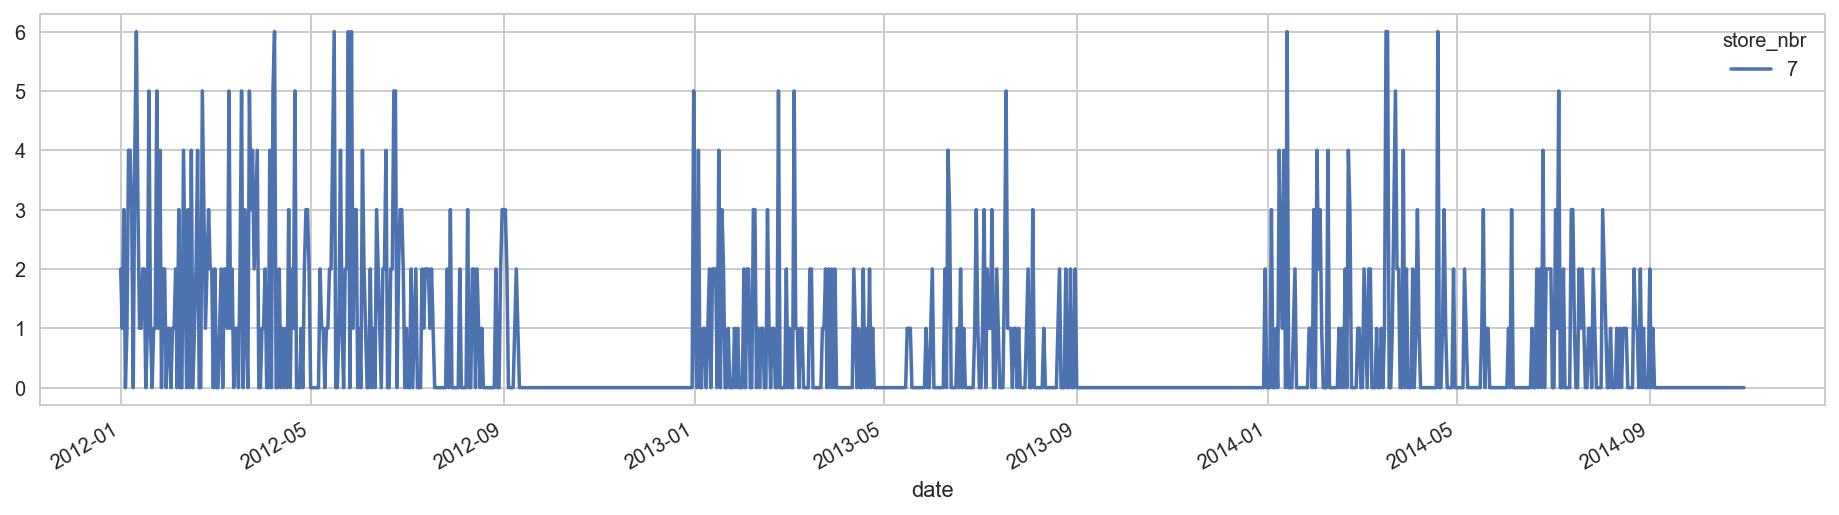

In [32]:
data_full[data_full.item_nbr == 7].pivot(index = "date", columns = "store_nbr", values = "units").plot(figsize=(16,4))
plt.show()

### (2) item = 15 (9월부터 3월까지만 팔리는 데이터)

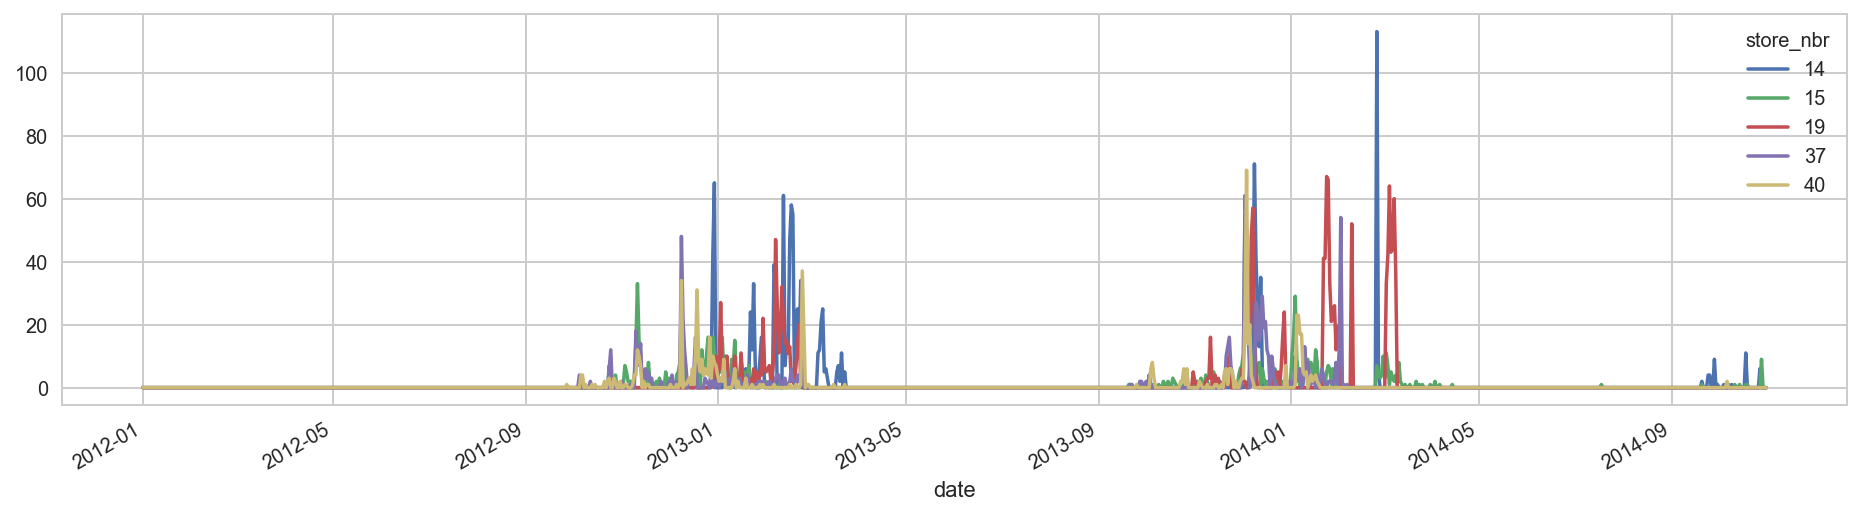

In [33]:
data_full[data_full.item_nbr == 15].pivot(index = "date", columns = "store_nbr", values = "units").plot(figsize=(16,4))
plt.show()

## 특정 기간 이후, 혹은 이전만 팔리는 데이터

### (3) item = 22 

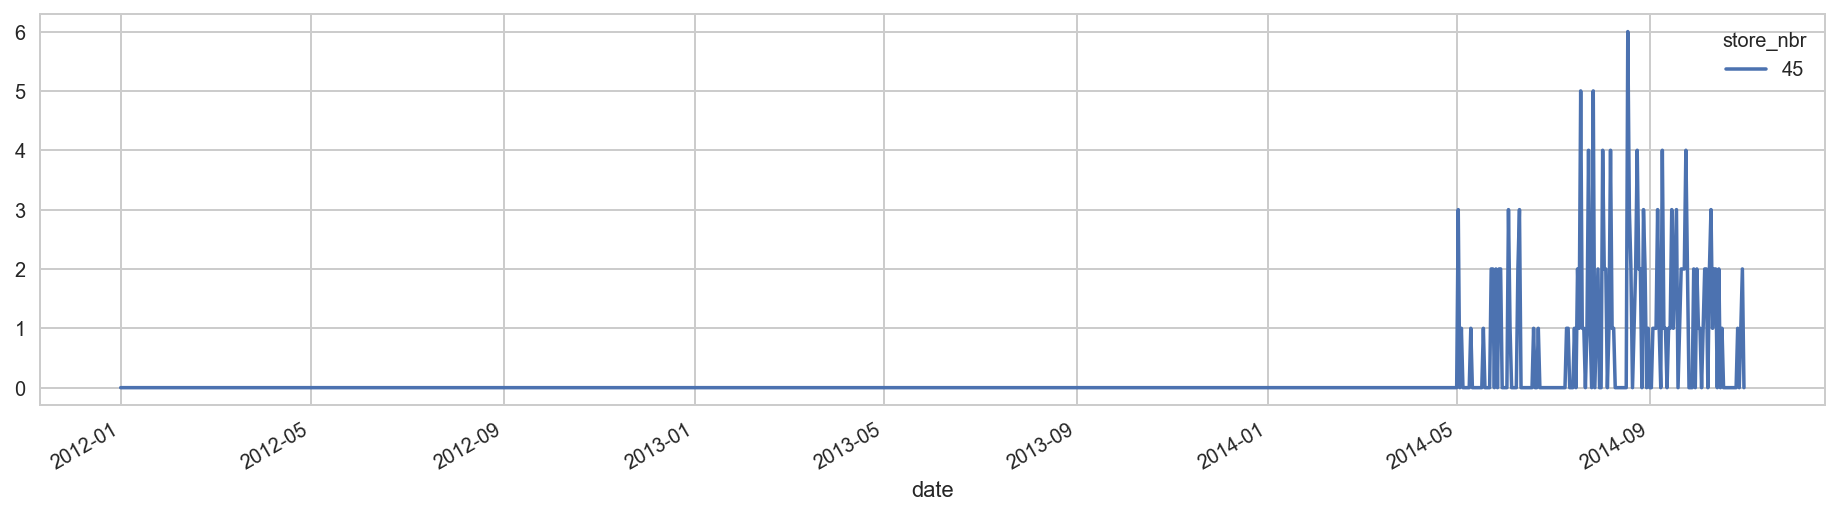

In [34]:
data_full[data_full.item_nbr == 22].pivot(index = "date", columns = "store_nbr", values = "units").plot(figsize=(16,4))
plt.show()

### pivot table to show 

In [35]:
pivot_df = data_full.groupby(["year","month","item_nbr"]).mean().reset_index().pivot_table(index =  ["year", "month"], columns = "item_nbr", values = "units")#
pivot_df = pivot_df.fillna(0)
pivot_df1 = pivot_df.cumsum()
pivot_df2 = (pivot_df * pivot_df1).where(pivot_df ==0, 1)

In [36]:
pivot_df_after = pivot_df2[[22,38,47,64,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111]]
pivot_df_after.style.apply(lambda x: ["background: #F78181" if abs(v) == 0 else "" for v in x], axis = 1)

### item = 69 

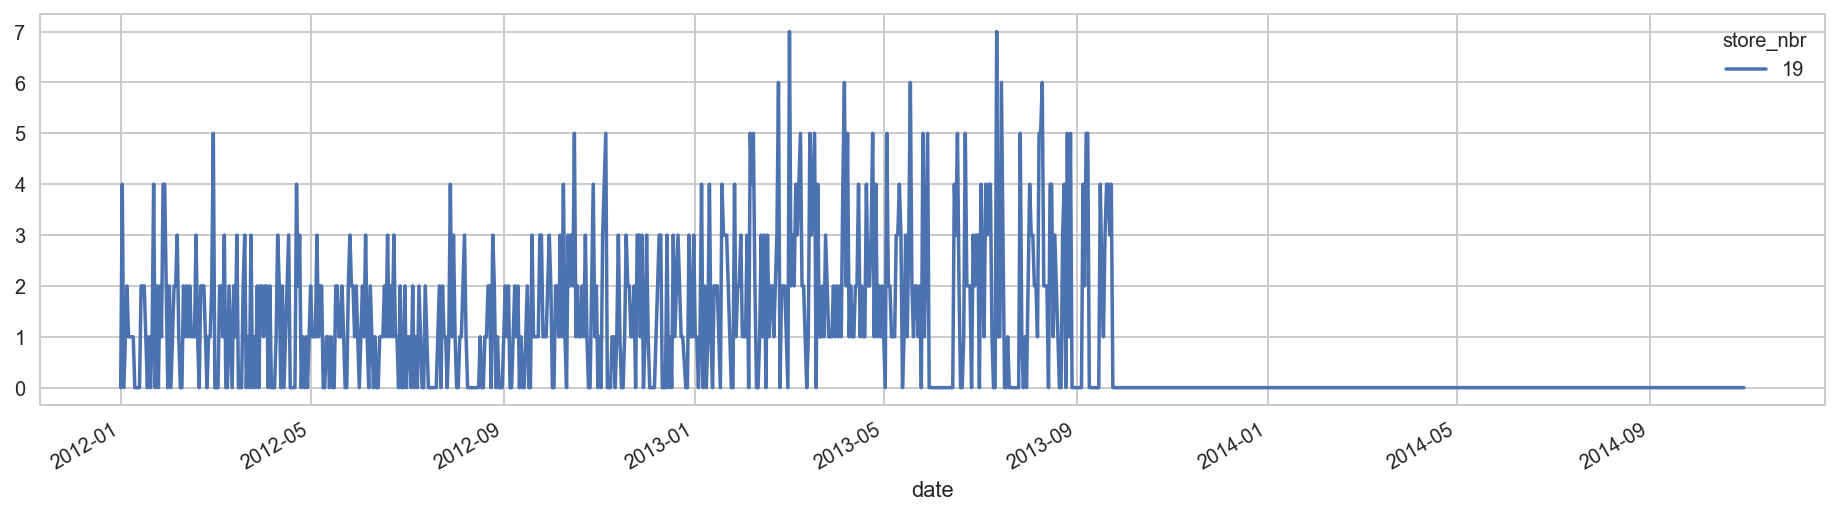

In [37]:
data_full[data_full.item_nbr == 69].pivot(index = "date", columns = "store_nbr", values = "units").plot(figsize=(16,4))
plt.show()

### pivot table to show 

In [38]:
pivot_df_after = pivot_df2[::-1][[17,18,19,20,21,52,69,81,84,85,88,89,93]]
pivot_df_after.style.apply(lambda x: ["background: #F78181" if abs(v) == 0 else "" for v in x], axis = 1)

In [39]:
item22  = data_full[(data_full.date >= pd.to_datetime("2014-05"))&(data_full.item_nbr == 22)].copy()
item38  = data_full[(data_full.date >= pd.to_datetime("2013-09"))&(data_full.item_nbr == 38)].copy()
item47  = data_full[(data_full.date >= pd.to_datetime("2013-09"))&(data_full.item_nbr == 47)].copy()
item64  = data_full[(data_full.date >= pd.to_datetime("2013-10"))&(data_full.item_nbr == 64)].copy()
item95  = data_full[(data_full.date >= pd.to_datetime("2013-07"))&(data_full.item_nbr == 95)].copy()
item97  = data_full[(data_full.date >= pd.to_datetime("2012-09"))&(data_full.item_nbr == 97)].copy()
item98  = data_full[(data_full.date >= pd.to_datetime("2012-07"))&(data_full.item_nbr == 98)].copy()
item99  = data_full[(data_full.date >= pd.to_datetime("2012-07"))&(data_full.item_nbr == 99)].copy()
item100 = data_full[(data_full.date >= pd.to_datetime("2012-09"))&(data_full.item_nbr == 100)].copy()
item101 = data_full[(data_full.date >= pd.to_datetime("2012-09"))&(data_full.item_nbr == 101)].copy()
item102 = data_full[(data_full.date >= pd.to_datetime("2013-03"))&(data_full.item_nbr == 102)].copy()
item103 = data_full[(data_full.date >= pd.to_datetime("2012-12"))&(data_full.item_nbr == 103)].copy()
item104 = data_full[(data_full.date >= pd.to_datetime("2013-04"))&(data_full.item_nbr == 104)].copy()
item105 = data_full[(data_full.date >= pd.to_datetime("2013-04"))&(data_full.item_nbr == 105)].copy()
item106 = data_full[(data_full.date >= pd.to_datetime("2013-05"))&(data_full.item_nbr == 106)].copy()
item107 = data_full[(data_full.date >= pd.to_datetime("2013-10"))&(data_full.item_nbr == 107)].copy()
item108 = data_full[(data_full.date >= pd.to_datetime("2013-10"))&(data_full.item_nbr == 108)].copy()
item109 = data_full[(data_full.date >= pd.to_datetime("2013-10"))&(data_full.item_nbr == 109)].copy()
item110 = data_full[(data_full.date >= pd.to_datetime("2014-03"))&(data_full.item_nbr == 110)].copy()
item111 = data_full[(data_full.date >= pd.to_datetime("2013-08"))&(data_full.item_nbr == 111)].copy()

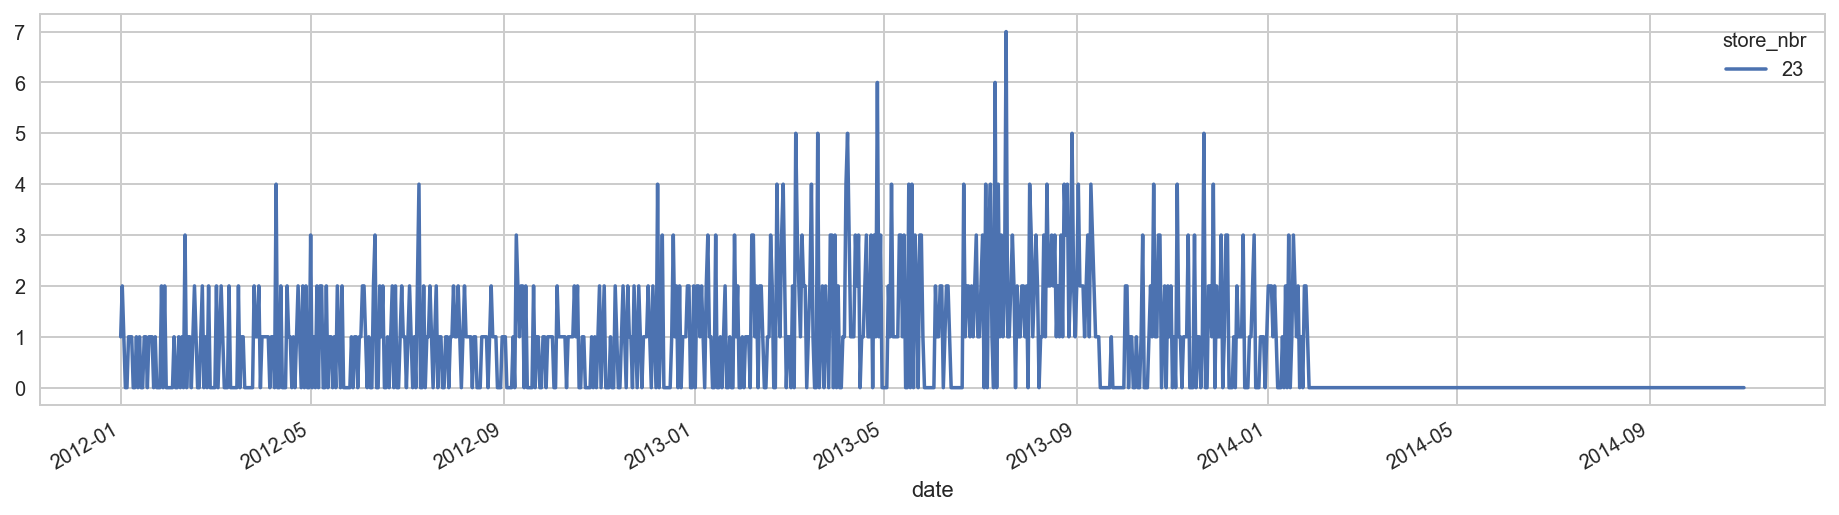

In [40]:
data_full[data_full.item_nbr == 29].pivot(index = "date", columns = "store_nbr", values = "units").plot(figsize=(16,4))
plt.show()

In [41]:
item17  =data_full[(data_full.date < pd.to_datetime("2014-02"))&(data_full.item_nbr == 17)].copy()
item18  =data_full[(data_full.date < pd.to_datetime("2014-02"))&(data_full.item_nbr == 18)].copy()
item19  =data_full[(data_full.date < pd.to_datetime("2014-02"))&(data_full.item_nbr == 19)].copy()
item20  =data_full[(data_full.date < pd.to_datetime("2014-02"))&(data_full.item_nbr == 20)].copy()
item21  =data_full[(data_full.date < pd.to_datetime("2014-02"))&(data_full.item_nbr == 21)].copy()
item24  =data_full[(data_full.date < pd.to_datetime("2013-10"))&(data_full.item_nbr == 24)].copy()
item29  =data_full[(data_full.date < pd.to_datetime("2014-02"))&(data_full.item_nbr == 29)].copy()
item33  =data_full[(data_full.date < pd.to_datetime("2013-10"))&(data_full.item_nbr == 33)].copy()
item42  =data_full[(data_full.date < pd.to_datetime("2013-08"))&(data_full.item_nbr == 42)].copy()
item46  =data_full[(data_full.date < pd.to_datetime("2013-01"))&(data_full.item_nbr == 46)].copy()
item48  =data_full[(data_full.date < pd.to_datetime("2013-06"))&(data_full.item_nbr == 48)].copy()
item52  =data_full[(data_full.date < pd.to_datetime("2014-02"))&(data_full.item_nbr == 52)].copy()
item69  =data_full[(data_full.date < pd.to_datetime("2013-10"))&(data_full.item_nbr == 69)].copy()
item81  =data_full[(data_full.date < pd.to_datetime("2013-02"))&(data_full.item_nbr == 81)].copy()
item84  =data_full[(data_full.date < pd.to_datetime("2013-08"))&(data_full.item_nbr == 84)].copy()
item85  =data_full[(data_full.date < pd.to_datetime("2013-05"))&(data_full.item_nbr == 85)].copy()
item88  =data_full[(data_full.date < pd.to_datetime("2013-08"))&(data_full.item_nbr == 88)].copy()
item89  =data_full[(data_full.date < pd.to_datetime("2013-06"))&(data_full.item_nbr == 89)].copy()
item93  =data_full[(data_full.date < pd.to_datetime("2013-03"))&(data_full.item_nbr == 93)].copy()


In [42]:
sliced_ls = set([22,38,47,64,95,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,17,18,19,20,21,24,29,33,42,46,48,52,69,81,84,85,88,89,93])

In [43]:
slice_df = pd.concat([item22  ,item38  ,item47  ,item64  ,item95  ,item97  ,
item98  ,item99  ,item100 ,item101 ,item102 ,item103 ,item104 ,item105 ,item106 ,item107 ,item108 ,
item109 ,item110 ,item111 ,item17 ,item18 ,item19 ,item20 ,item21 ,item24 ,item29 ,item33 ,item42 ,
item46 ,item48 ,item52 ,item69 ,item81 ,item84 ,item85 ,item88 ,item89 ,item93 ] )

In [44]:
nomal_ls = set(range(1,111 +1)) - set(sliced_ls) - set(season_ls)

In [45]:
nomal_df = data_full[data_full.item_nbr.apply(lambda x : x in nomal_ls)]

In [46]:
final_df = pd.concat([slice_df,nomal_df,season_df])

In [47]:
final_df["week_day_name"] = final_df['date'].dt.weekday_name
final_df.preciptotal = final_df.preciptotal.fillna(0)
final_df['hardrain'] = [(((4 if i > 8 else 3) if i > 6 else 2) if i > 1 else 1) if i > 0 else 0 for i in final_df['preciptotal']]
# rain 1 snow 2
# 득정조건열 추가 ()
final_df['hardsnow'] = [(( 3 if i > 3.5 else 2) if i > 1 else 1) if i > 0 else 0 for i in final_df['snowfall']]
final_df.item_nbr = pd.Categorical(final_df.item_nbr)
data_full.item_nbr = pd.Categorical(data_full.item_nbr)

---
## 데이터 샘플링

In [48]:
# 원 데이터  = final_df

In [49]:
train0, y_train, X_test, y_test = df_sampling(final_df)
train = sm.add_constant(train0)


### No. 1 OLS model fit : 'log_units ~ C(item_nbr)+C(store_nbr) + C(is_week) + C(is_holiday) + C(is_blackfriday) +0' 

In [50]:
model_OLS = sm.OLS.from_formula('log_units ~ C(item_nbr)+C(store_nbr) + C(is_week) + scale(preciptotal) + C(is_holiday) + C(is_blackfriday) + 0', data = train)
results_OLS = model_OLS.fit()
print(results_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2250.
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:47:01   Log-Likelihood:            -1.9745e+05
No. Observations:              143645   AIC:                         3.952e+05
Df Residuals:                  143487   BIC:                         3.968e+05
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(item_nbr)[1]             0

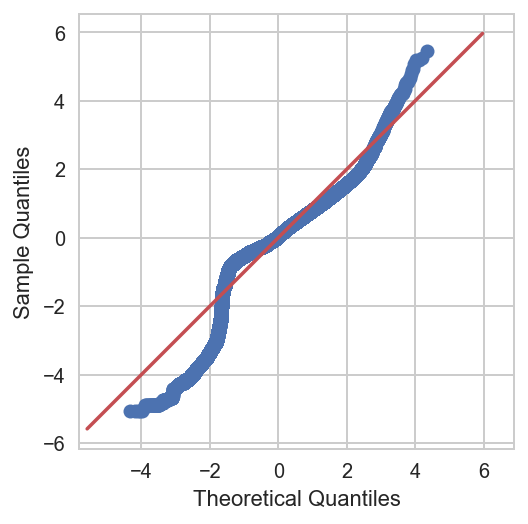

In [51]:
sm.qqplot(results_OLS.resid, fit=True, line='45');
plt.gca().axis("square");

### No.1 model prediction : y hat (predicted) vs. y (actual) 

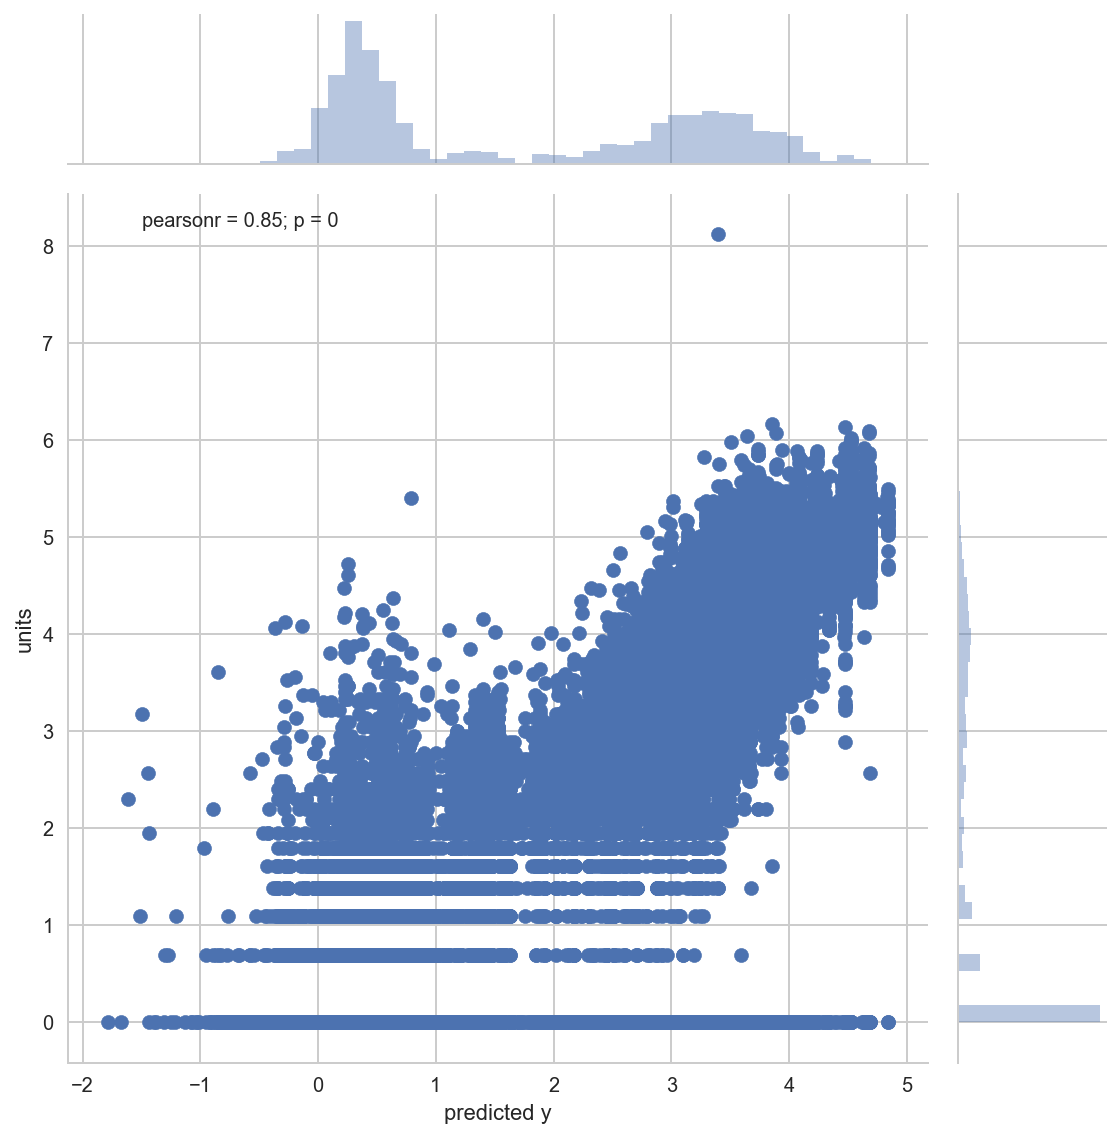

In [52]:
y_1_new = pd.Series(results_OLS.predict(X_test), name = "predicted y")
sns.jointplot(y_1_new, np.log(y_test + 1), size =8)

plt.show()

### No. 1 Partial plot & residual plot 

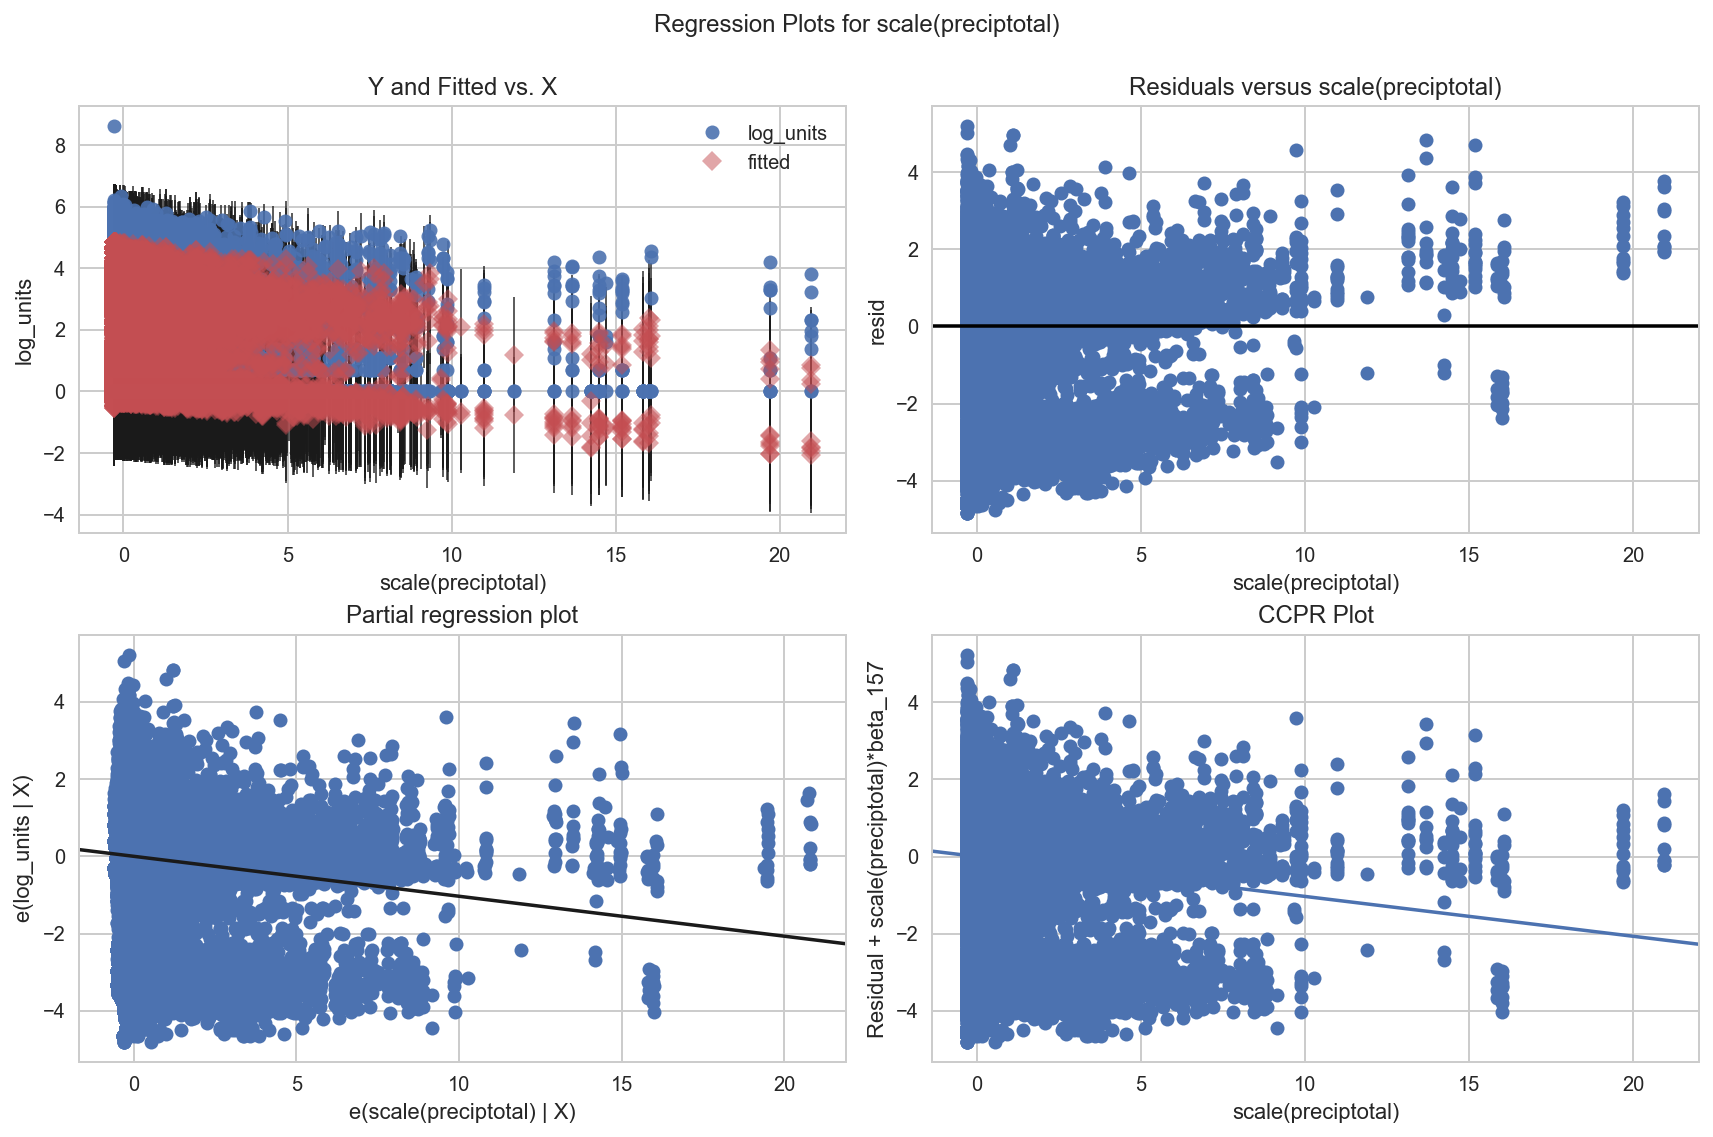

In [53]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(results_OLS, "scale(preciptotal)",fig=fig)
plt.show()

### outlier indexing 

In [54]:
influence = results_OLS.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train) - 7)
idx = np.where(cooks_d2 > fox_cr)[0]

### outlier remove from model above (No.1) : sales value = 0 at sudden point as not expected which regarded supply shortage or supplier decision

In [55]:
train.hardrain = pd.Categorical(train.hardrain)

In [56]:
idx_t = list(set(train.index)  - set(idx))
new_df = train.iloc[idx_t].copy()

In [57]:
model_OLS2 = sm.OLS.from_formula('log_units ~ C(item_nbr)+C(store_nbr) + C(is_week) + scale(preciptotal) + C(is_holiday) + C(is_blackfriday) + 0', data = new_df)
results_OLS2 = model_OLS2.fit()
print(results_OLS2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     7552.
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:48:36   Log-Likelihood:            -1.1610e+05
No. Observations:              135099   AIC:                         2.325e+05
Df Residuals:                  134941   BIC:                         2.341e+05
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(item_nbr)[1]             0

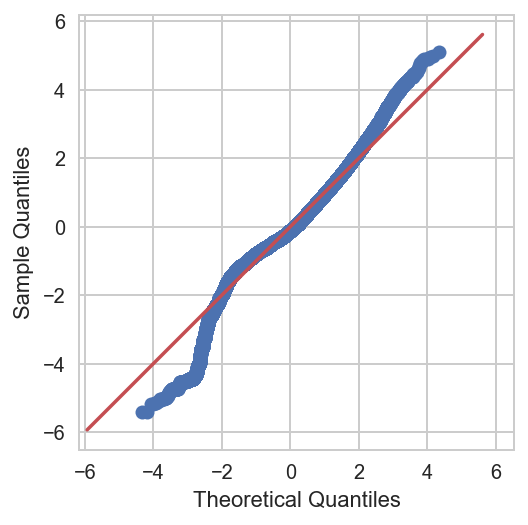

In [59]:
sm.qqplot(results_OLS2.resid, fit=True, line='45');
plt.gca().axis("square");

### No. 2 OLS model fit : 'log_units ~ C(item_nbr) + C(store_nbr) + scale(preciptotal) +  C(FZ) + C(is_blackfriday) + C(hardsnow) + 0'

In [58]:
model_OLS_stormy = sm.OLS.from_formula('log_units ~ C(item_nbr) + C(store_nbr) + scale(preciptotal) +  C(FZ) + C(is_blackfriday) + C(hardsnow) + 0', data = new_df)
results_OLS_stormy = model_OLS_stormy.fit()
print(results_OLS_stormy.summary())

                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     7271.
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:48:49   Log-Likelihood:            -1.1725e+05
No. Observations:              135099   AIC:                         2.348e+05
Df Residuals:                  134938   BIC:                         2.364e+05
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(item_nbr)[1]             0

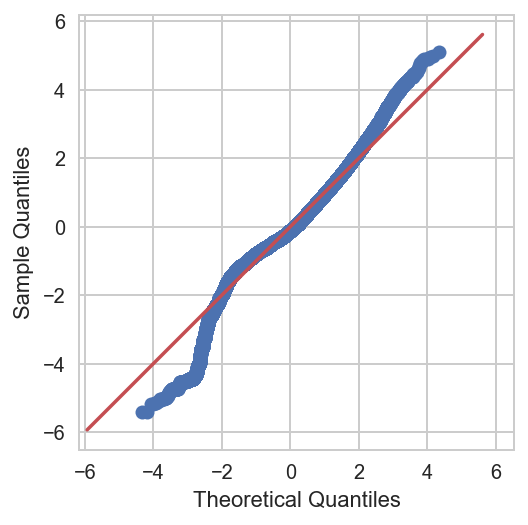

In [60]:
sm.qqplot(results_OLS2.resid, fit=True, line='45');
plt.gca().axis("square");

| 모델 평가 지표|  값|
|--------|--------|
| R-squared                    |   0.897 | 
| Adj. R-squared               |   0.897 |
|  F-statistic                 |    7348. |
|  Prob (F-statistic)          |     0.00 |
|   AIC                        | 2.337e+05 |
|  BIC                        | 2.353e+05 |
                                        

---

|variable |coef|std err|t|P>abs(t)|
|--------|--------|-----|---|---|---|
|FZ)[T.1]                |  0.0517    |   0.012      | 4.243  |     0.000      | 
|(is_blackfriday)[T.1]  |   -0.2019  |     0.017    | -11.979|       0.000    | 
|C(hardsnow)[T.1]        |    0.0452  |     0.013    |   3.538|       0.000    | 
|C(hardsnow)[T.2]        |    0.0154  |     0.032    |   0.474|       0.635    | 
|C(hardsnow)[T.3]        |   -0.2116  |     0.044    |  -4.821|       0.000    | 
|scale(preciptotal)      |   -0.0293  |     0.002    | -18.452|       0.000    | 

### No.2 model prediction : y hat (predicted) vs. y (actual) 

In [61]:
X_test.hardrain = pd.Categorical(X_test.hardrain)

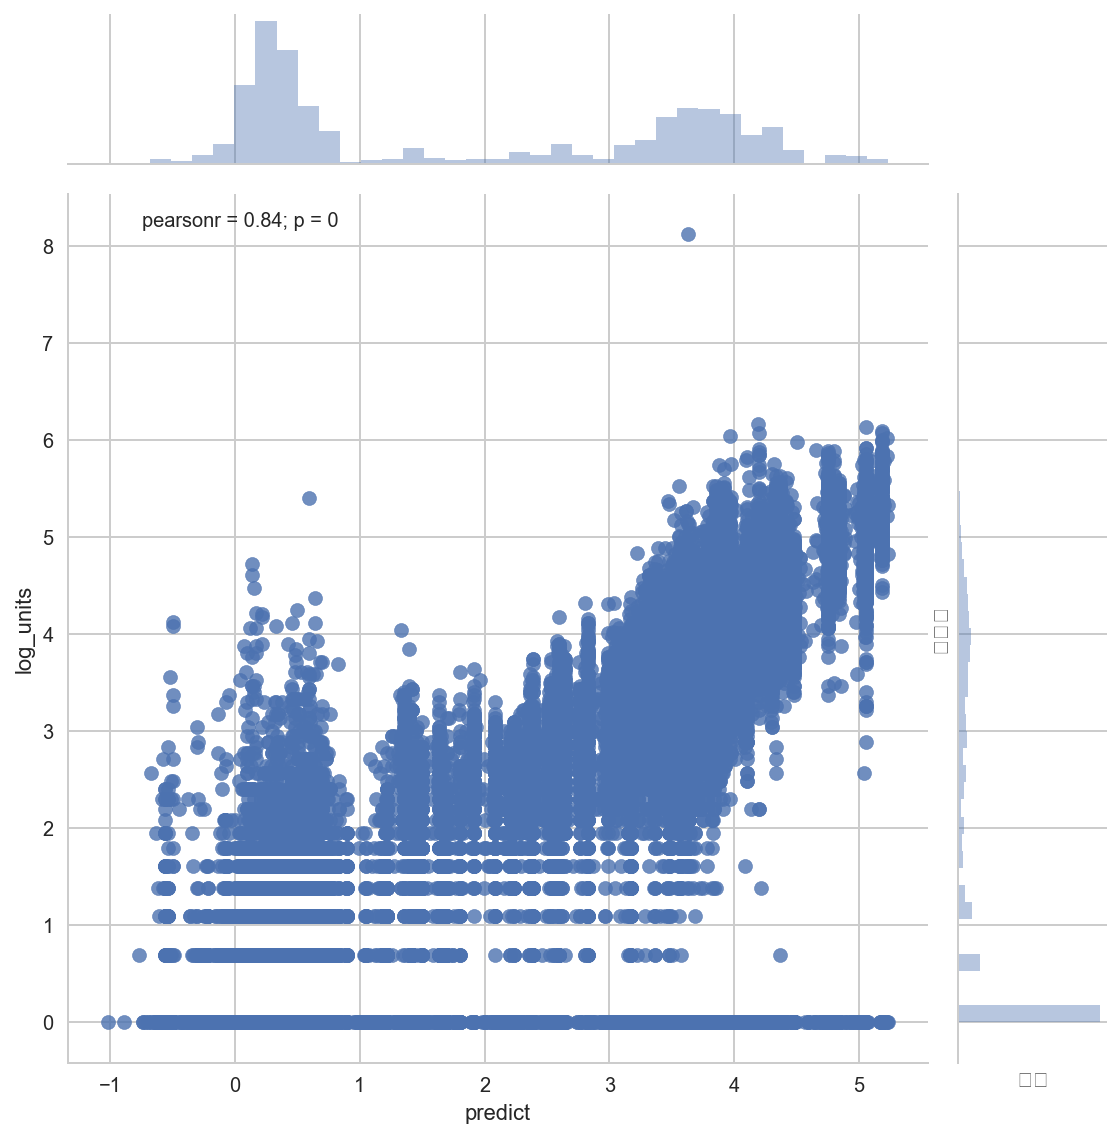

In [62]:
pttemp=X_test.copy()
pttemp['predict']=results_OLS_stormy.predict(X_test)

# sns.jointplot(results_OLS_stormy.predict(X_test), np.log(y_test + 1),color = X_test.item_nbr, size=10)
# g= sns.lmplot(data=pttemp, x="log_units", y="predict", size = 8, fit_reg=False)
# sns.jointplot(data=pttemp, x='log_units', y='predict', alpha=0.05,size=8)
sns.jointplot(data=pttemp, x='predict', y='log_units', alpha=0.8,size=8)

plt.xlabel(u"실제")
plt.ylabel(u"예측치")
plt.show()

### No. 2 partial regression and residual plot 

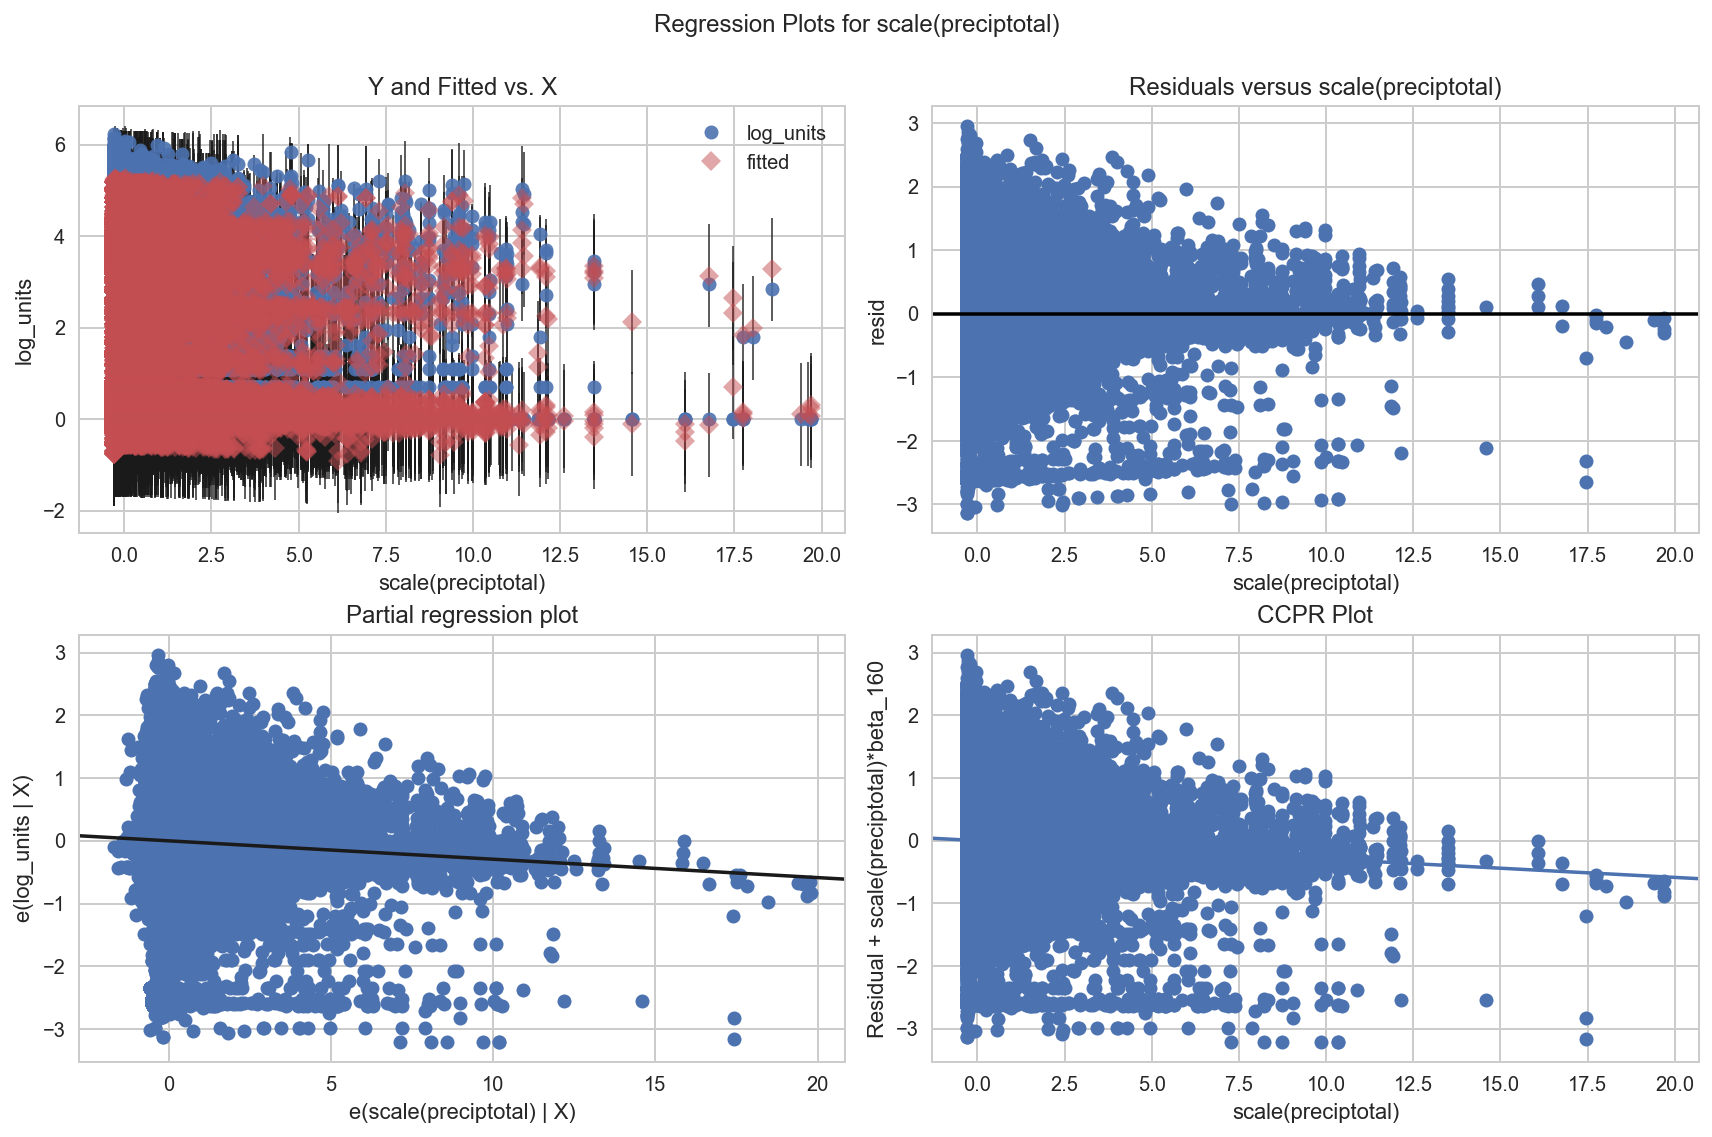

In [63]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(results_OLS_stormy, "scale(preciptotal)",fig=fig)
plt.show()

In [ ]:
y_hat = results_OLS_stormy.predict(final_df)

In [ ]:
sample_df = pd.read_csv("sampleSubmission.csv")

In [ ]:
test_df  = pd.read_csv("test.csv")

In [ ]:
df_sub = pd.concat([final_df, pd.DataFrame(y_hat)], axis = 1)[["date","store_nbr","item_nbr",0]]

In [ ]:
df_sub.date = df_sub.date.astype(object)
df_sub.date = df_sub.date.apply(lambda x : str(x)[:10])
df_sub.item_nbr = df_sub.item_nbr.astype(int)
df_sub[0]   = np.exp(df_sub[0]) - 1
df_sub[0]   = df_sub[0].where(df_sub[0] > 0, 0)

In [ ]:
extreme_sub_df = pd.merge(test_df,df_sub, how = "left").fillna(0)[0]

In [ ]:
sample_df["units"] = extreme_sub_df

In [ ]:
sample_df.to_csv("sub_form")